In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, confusion_matrix, roc_curve, roc_auc_score,recall_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\data_wo_cluster.csv")
data = data.sample(frac=1).reset_index(drop=True)

# Separate features and target variable
X = data.drop(columns=['CLASS'])
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the training data
preprocessor.fit(X_train)
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Reshape encoded data for compatibility with Conv1D
X_train_reshaped = X_train_encoded.toarray().reshape(X_train_encoded.shape[0], X_train_encoded.shape[1], 1)
X_test_reshaped = X_test_encoded.toarray().reshape(X_test_encoded.shape[0], X_test_encoded.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("ROC-AUC Score:", roc_auc)
print("Recall", recall)



Epoch 1/10


C:\Users\beher\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6496 - loss: 0.6402 - val_accuracy: 0.7451 - val_loss: 0.5348
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5685 - val_accuracy: 0.7495 - val_loss: 0.5351
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7115 - loss: 0.5674 - val_accuracy: 0.7603 - val_loss: 0.5172
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7408 - loss: 0.5302 - val_accuracy: 0.7667 - val_loss: 0.5139
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7482 - loss: 0.5281 - val_accuracy: 0.7559 - val_loss: 0.5055
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7440 - loss: 0.5271 - val_accuracy: 0.7667 - val_loss: 0.5024
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7314 - loss: 0.5356 - val_accuracy: 0.7646 - val_loss: 0.4949
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7657 - loss: 0.5086 - val_accuracy: 0.7516 - val_loss: 0.5008
Ep

In [7]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, confusion_matrix, roc_auc_score, roc_curve, confusion_matrix

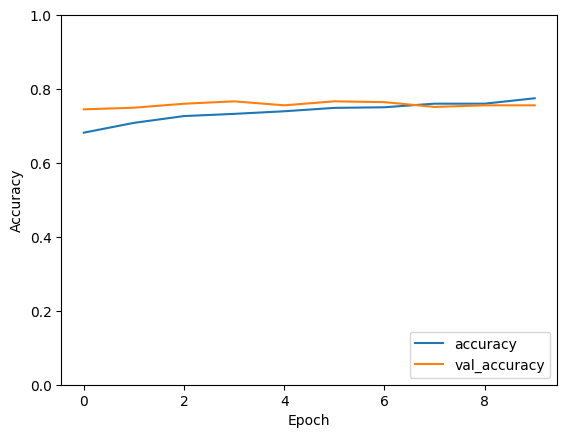

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Confusion Matrix:
[[350 139]
 [ 94 408]]
True Positive Rate (TPR): 0.8127490039840638
False Positive Rate (FPR): 0.2842535787321063
False Negative Rate (FNR): 0.18725099601593626
True Negative Rate (TNR): 0.7157464212678937


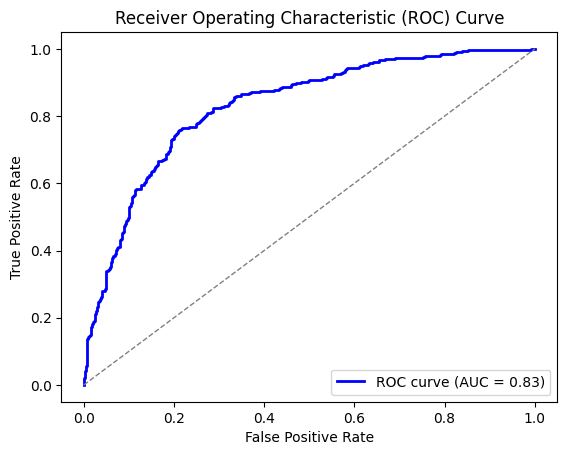

Confusion Matrix:
[[350 139]
 [ 94 408]]


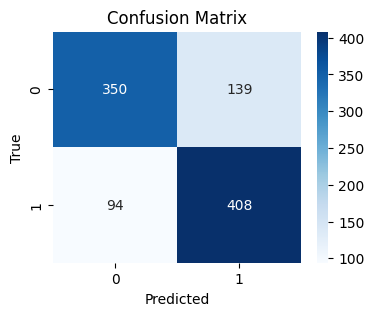

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate True Positive Rate (TPR), False Positive Rate (FPR), False Negative Rate (FNR), True Negative Rate (TNR)
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TNR = TN / (TN + FP)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)
print("True Negative Rate (TNR):", TNR)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix
import seaborn as sns
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [10]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\ls_merge_data.csv")
X_new_encoded = preprocessor.transform(new_data)
X_new_reshaped = X_new_encoded.toarray().reshape(X_new_encoded.shape[0], X_new_encoded.shape[1], 1)

# Predict probabilities for new data
y_pred_prob_new = model.predict(X_new_reshaped)

# Save predictions with probabilities
prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability'])
new_data_with_prob = pd.concat([new_data, prob_df], axis=1)
new_data_with_prob.to_csv('cnn_NEWSHING_cat_lulc3_predictions_with_probabilities.csv', index=False)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [22]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\NEW_TESTING.csv")
X_new_encoded = preprocessor.transform(new_data)
X_new_reshaped = X_new_encoded.toarray().reshape(X_new_encoded.shape[0], X_new_encoded.shape[1], 1)

# Predict probabilities for new data
y_pred_prob_new = model.predict(X_new_reshaped)

# Save predictions with probabilities
prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability'])
new_data_with_prob = pd.concat([new_data, prob_df], axis=1)
# new_data_with_prob.to_csv('cnn_cat_lulc3_predictions_with_probabilities.csv', index=False)

24384/24384 ━━━━━━━━━━━━━━━━━━━━ 109s 4ms/step


In [23]:
new_data_with_prob.to_csv('cnn_70_cat_lulc3_predictions_with_probabilities.csv', index=False)

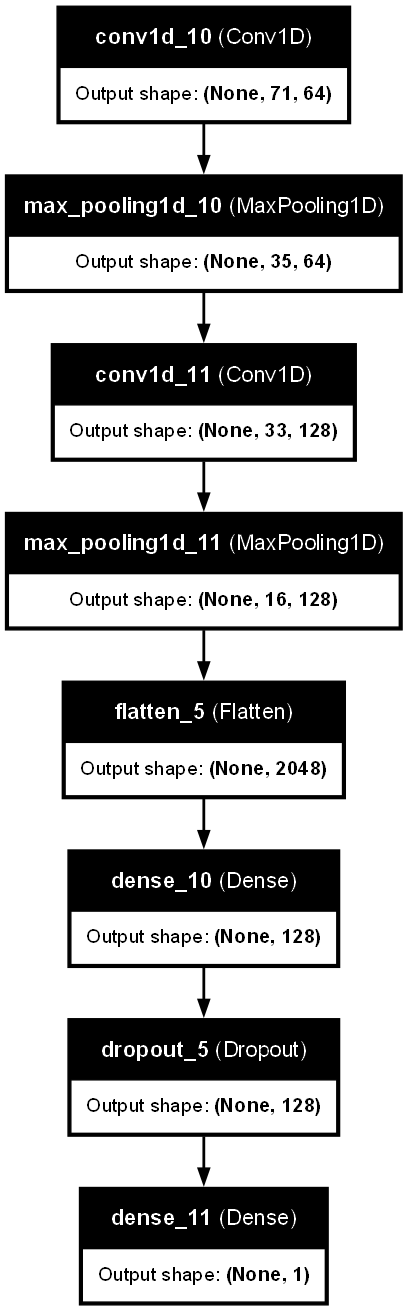

In [24]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your constructed CNN model
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True, dpi=100)

In [25]:
# Assuming `model` is your constructed CNN model
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 71, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 35, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 33, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 16, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 862,085 (3.29 MB)

 Trainable params: 287,361 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 574,724 (2.19 MB)